## Crop & Fertilizer Recommendation Using ML

In [2]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#loading the dataset
crop = pd.read_csv('Dataset/Crop_recommendation.csv')

In [4]:
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [5]:
crop.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [6]:
crop.shape

(2200, 8)

In [7]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [10]:
#to check for missing values
crop.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [12]:
#to check for duplicate values
crop.duplicated().sum()

0

In [13]:
#to check the statistical summary
crop.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [14]:
#to check the target feature distribution
crop['label'].value_counts()


label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

In [1]:
import pandas as pd
import numpy as np

# For visualization (if needed)
import matplotlib.pyplot as plt
import seaborn as sns

# For machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# To save/load model
import joblib


In [3]:
# Path to your dataset
crop_data_path = 'Dataset/Crop_recommendation.csv'

# Load into a dataframe
df_crop = pd.read_csv(crop_data_path)

# Peek at the data
df_crop.head()


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


Shape of crop dataset: (2200, 8)
Columns: Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')
                 N            P            K  temperature     humidity   
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000  \
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.000000    20.000000    22.769375    60.261953   
50%      37.000000    51.000000    32.000000    25.598693    80.473146   
75%      84.250000    68.000000    49.000000    28.561654    89.948771   
max     140.000000   145.000000   205.000000    43.675493    99.981876   

                ph     rainfall  
count  2200.000000  2200.000000  
mean      6.469480   103.463655  
std       0.773938    54.958389  
min       3.504752    20.211267  
25%       5.971693    64.551

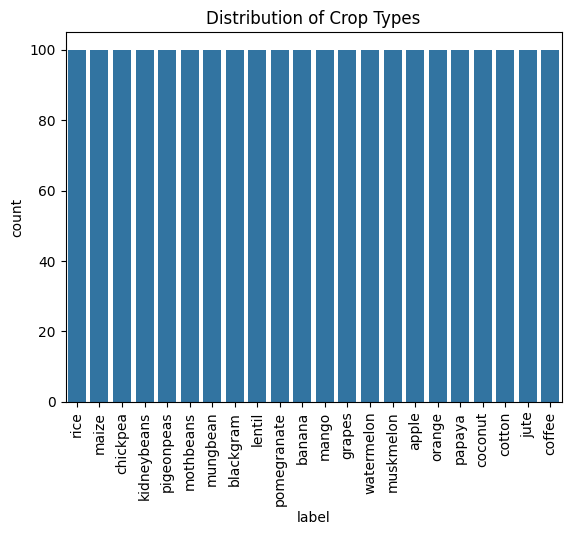

In [4]:
print("Shape of crop dataset:", df_crop.shape)
print("Columns:", df_crop.columns)
print(df_crop.describe())

# Check for missing values
print(df_crop.isnull().sum())

# Optional: show distribution of the target
sns.countplot(x='label', data=df_crop)
plt.title("Distribution of Crop Types")
plt.xticks(rotation=90)
plt.show()


In [5]:
X = df_crop.drop('label', axis=1)  # all columns except the label
y = df_crop['label']              # target: crop type


In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y
)


In [7]:
rf_model = RandomForestClassifier(
    n_estimators=100, 
    random_state=42
)

rf_model.fit(X_train_scaled, y_train)


NameError: name 'X_train_scaled' is not defined

In [8]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [9]:
rf_model = RandomForestClassifier(
    n_estimators=100, 
    random_state=42
)

rf_model.fit(X_train_scaled, y_train)


RandomForestClassifier(random_state=42)

Accuracy: 0.9954545454545455
Classification Report:
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        20
      banana       1.00      1.00      1.00        20
   blackgram       1.00      0.95      0.97        20
    chickpea       1.00      1.00      1.00        20
     coconut       1.00      1.00      1.00        20
      coffee       1.00      1.00      1.00        20
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        20
        jute       0.95      1.00      0.98        20
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      1.00      1.00        20
       maize       0.95      1.00      0.98        20
       mango       1.00      1.00      1.00        20
   mothbeans       1.00      1.00      1.00        20
    mungbean       1.00      1.00      1.00        20
   muskmelon       1.00      1.00      1.00        20
      orange       1.00      

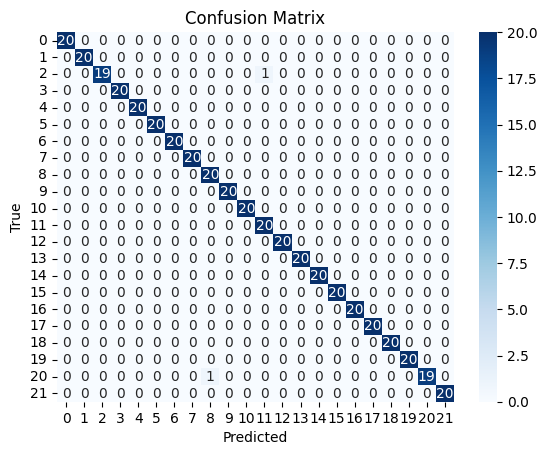

In [10]:
y_pred = rf_model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


In [11]:
# Save the model
joblib.dump(rf_model, 'crop_model.pkl')
# Save the scaler if used
joblib.dump(scaler, 'crop_scaler.pkl')


['crop_scaler.pkl']

In [12]:
# Load
rf_model_loaded = joblib.load('crop_model.pkl')
scaler_loaded = joblib.load('crop_scaler.pkl')


In [13]:
# Example new data (one row)
sample = [[90, 42, 43, 20.0, 80.0, 6.0, 200.0]]  # [N, P, K, temperature, humidity, pH, rainfall]
sample_scaled = scaler_loaded.transform(sample)
crop_pred = rf_model_loaded.predict(sample_scaled)
print("Recommended crop:", crop_pred[0])


Recommended crop: rice


C:\Users\mayur\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [15]:
fert_data_path = 'Dataset/Fertilizer Prediction.csv'
df_fert = pd.read_csv(fert_data_path)

df_fert.head()
df_fert.info()
df_fert.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Temparature      99 non-null     int64 
 1   Humidity         99 non-null     int64 
 2   Moisture         99 non-null     int64 
 3   Soil Type        99 non-null     object
 4   Crop Type        99 non-null     object
 5   Nitrogen         99 non-null     int64 
 6   Potassium        99 non-null     int64 
 7   Phosphorous      99 non-null     int64 
 8   Fertilizer Name  99 non-null     object
dtypes: int64(6), object(3)
memory usage: 7.1+ KB


Temparature        0
Humidity           0
Moisture           0
Soil Type          0
Crop Type          0
Nitrogen           0
Potassium          0
Phosphorous        0
Fertilizer Name    0
dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Example for label encoding
le_crop = LabelEncoder()
le_soil = LabelEncoder()
le_fert = LabelEncoder()

df_fert['CropType'] = le_crop.fit_transform(df_fert['CropType'])
df_fert['SoilType'] = le_soil.fit_transform(df_fert['SoilType'])
df_fert['CurrentDeficiency'] = le_fert.fit_transform(df_fert['CurrentDeficiency'])


KeyError: 'RecommendedFertilizer'

In [19]:
# main.ipynb
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import joblib

# 1. Load crop data
df_crop = pd.read_csv('Dataset/Crop_recommendation.csv')
X_crop = df_crop.drop('label', axis=1)
y_crop = df_crop['label']

# 2. Train-test split
X_train_crop, X_test_crop, y_train_crop, y_test_crop = train_test_split(
    X_crop, y_crop, 
    test_size=0.2, 
    random_state=42
)

# 3. Train RandomForest
rf_crop = RandomForestClassifier(n_estimators=100, random_state=42)
rf_crop.fit(X_train_crop, y_train_crop)
y_pred_crop = rf_crop.predict(X_test_crop)

# 4. Evaluate
print("Crop Model Accuracy:", accuracy_score(y_test_crop, y_pred_crop))
print("Classification Report (Crop):")
print(classification_report(y_test_crop, y_pred_crop))

# 5. Save model
joblib.dump(rf_crop, 'crop_model.pkl')

# Repeat similar steps for fertilizer
df_fert = pd.read_csv('Dataset/Fertilizer Prediction.csv')

# Suppose your columns: 
# [CropType, SoilType, N, P, K, CurrentDeficiency, RecommendedFertilizer]
X_fert = df_fert.drop('RecommendedFertilizer', axis=1)
y_fert = df_fert['RecommendedFertilizer']

X_train_fert, X_test_fert, y_train_fert, y_test_fert = train_test_split(
    X_fert, y_fert, 
    test_size=0.2, 
    random_state=42
)

rf_fert = RandomForestClassifier(n_estimators=100, random_state=42)
rf_fert.fit(X_train_fert, y_train_fert)
y_pred_fert = rf_fert.predict(X_test_fert)

print("Fertilizer Model Accuracy:", accuracy_score(y_test_fert, y_pred_fert))
print("Classification Report (Fertilizer):")
print(classification_report(y_test_fert, y_pred_fert))

joblib.dump(rf_fert, 'fertilizer_model.pkl')

print("Models saved successfully!")


Crop Model Accuracy: 0.9931818181818182
Classification Report (Crop):
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.92      1.00      0.96        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.92      1.00      0.96        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.96      0.98        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orang

KeyError: "['RecommendedFertilizer'] not found in axis"

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import joblib

# Load the fertilizer dataset
fert_data_path = 'Dataset/Fertilizer Prediction.csv'  # Ensure the path is correct
df_fert = pd.read_csv(fert_data_path)

# Standardize column names: remove spaces and convert to lowercase
df_fert.columns = df_fert.columns.str.strip().str.lower()

# Display the standardized columns
print("Standardized Columns:")
print(df_fert.columns.tolist())

# Verify if 'recommended fertilizer' exists
if 'recommended fertilizer' not in df_fert.columns:
    # Attempt to find a close match
    possible_cols = [col for col in df_fert.columns if 'fertilizer' in col]
    if possible_cols:
        target_col = possible_cols[0]
        print(f"Using '{target_col}' as the target column.")
    else:
        raise KeyError("No column related to 'Recommended Fertilizer' found in the dataset.")
else:
    target_col = 'recommended fertilizer'

# Prepare features and target
X_fert = df_fert.drop(target_col, axis=1)
y_fert = df_fert[target_col]

# (Optional) Handle categorical variables if present
# For example, 'crop type' and 'soil type' might be categorical
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoders
le_crop = LabelEncoder()
le_soil = LabelEncoder()

# Encode 'crop type' and 'soil type'
if 'crop type' in X_fert.columns:
    X_fert['crop type'] = le_crop.fit_transform(X_fert['crop type'])
if 'soil type' in X_fert.columns:
    X_fert['soil type'] = le_soil.fit_transform(X_fert['soil type'])

# If 'current deficiency' exists and needs encoding
if 'current deficiency' in X_fert.columns:
    le_def = LabelEncoder()
    X_fert['current deficiency'] = le_def.fit_transform(X_fert['current deficiency'])

# Split into training and testing sets
X_train_fert, X_test_fert, y_train_fert, y_test_fert = train_test_split(
    X_fert, y_fert, 
    test_size=0.2, 
    random_state=42,
    stratify=y_fert
)

# Initialize and train the Random Forest Classifier
rf_fert = RandomForestClassifier(n_estimators=100, random_state=42)
rf_fert.fit(X_train_fert, y_train_fert)

# Make predictions
y_pred_fert = rf_fert.predict(X_test_fert)

# Evaluate the model
print("Fertilizer Model Accuracy:", accuracy_score(y_test_fert, y_pred_fert))
print("Classification Report (Fertilizer):")
print(classification_report(y_test_fert, y_pred_fert))

# Save the fertilizer model
joblib.dump(rf_fert, 'fertilizer_model.pkl')

print("Fertilizer model trained and saved successfully!")


Standardized Columns:
['temparature', 'humidity', 'moisture', 'soil type', 'crop type', 'nitrogen', 'potassium', 'phosphorous', 'fertilizer name']
Using 'fertilizer name' as the target column.
Fertilizer Model Accuracy: 1.0
Classification Report (Fertilizer):
              precision    recall  f1-score   support

    10-26-26       1.00      1.00      1.00         1
    14-35-14       1.00      1.00      1.00         3
    17-17-17       1.00      1.00      1.00         1
       20-20       1.00      1.00      1.00         3
       28-28       1.00      1.00      1.00         3
         DAP       1.00      1.00      1.00         4
        Urea       1.00      1.00      1.00         5

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

Fertilizer model trained and saved successfully!


In [21]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    verbose=2
)

# Fit GridSearchCV
grid_search.fit(X_train_fert, y_train_fert)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Best estimator
best_rf_fert = grid_search.best_estimator_

# Evaluate the best model
y_pred_best = best_rf_fert.predict(X_test_fert)
print("Optimized Fertilizer Model Accuracy:", accuracy_score(y_test_fert, y_pred_best))
print("Classification Report (Optimized Fertilizer):")
print(classification_report(y_test_fert, y_pred_best))

# Save the optimized model
joblib.dump(best_rf_fert, 'fertilizer_model_optimized.pkl')


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Optimized Fertilizer Model Accuracy: 1.0
Classification Report (Optimized Fertilizer):
              precision    recall  f1-score   support

    10-26-26       1.00      1.00      1.00         1
    14-35-14       1.00      1.00      1.00         3
    17-17-17       1.00      1.00      1.00         1
       20-20       1.00      1.00      1.00         3
       28-28       1.00      1.00      1.00         3
         DAP       1.00      1.00      1.00         4
        Urea       1.00      1.00      1.00         5

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



['fertilizer_model_optimized.pkl']